# Data Preprocessing

In [1]:
#read the dataset


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Data display customization
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 1)

In [4]:
#Importing the dataset
df=pd.read_csv('EastWestAirlines.csv')
df.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0  1    28143    0           1          1          1          174           
1  2    19244    0           1          1          1          215           
2  3    41354    0           1          1          1          4123          
3  4    14776    0           1          1          1          500           
4  5    97752    0           4          1          1          43300         

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0  1            0                  0                7000               0       
1  2            0                  0                6968               0       
2  4            0                  0                7034               0       
3  1            0                  0                6952               0       
4  26           2077               4                6935               1

In [5]:
#column rename
df.rename(columns={'Award?':'Award','ID#':'ID'},inplace=True)


In [6]:
columns=df.columns
columns

Index(['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

In [7]:
print(df.shape)
print(df.info())

(3999, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB
None


In [8]:
#check for any missing values, 
df.isnull().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [9]:
#Let's have a look at how may labels each variable has 
for col in df.columns:
    print(col,':',len(df[col].unique()),'labels')

ID : 3999 labels
Balance : 3904 labels
Qual_miles : 164 labels
cc1_miles : 5 labels
cc2_miles : 3 labels
cc3_miles : 5 labels
Bonus_miles : 2734 labels
Bonus_trans : 57 labels
Flight_miles_12mo : 343 labels
Flight_trans_12 : 35 labels
Days_since_enroll : 2820 labels
Award : 2 labels


In [10]:
# different cc_miles have different max values.
# so, we want to check what values these columns can take

print('unique_cc1',df.cc1_miles.unique())
print('unique_cc2',df.cc2_miles.unique())
print('unique_cc3',df.cc3_miles.unique())

unique_cc1 [1 4 3 2 5]
unique_cc2 [1 2 3]
unique_cc3 [1 3 2 4 5]


In [11]:
#for any duplicate value
df.duplicated().sum()

0

In [12]:
df[df.duplicated()]

Empty DataFrame
Columns: [ID, Balance, Qual_miles, cc1_miles, cc2_miles, cc3_miles, Bonus_miles, Bonus_trans, Flight_miles_12mo, Flight_trans_12, Days_since_enroll, Award]
Index: []

In [13]:
#here ther is one duplicate values , here i droping duplicate from original dataset
df.drop_duplicates(inplace=True)

In [14]:
#descriptive statistics
df.describe()

ID       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03  3999.000000   3999.000000  3999.000000   
mean   2014.819455  7.360133e+04  144.114529    2.059515     1.014504      
std    1160.764358  1.007757e+05  773.663804    1.376919     0.147650      
min    1.000000     0.000000e+00  0.000000      1.000000     1.000000      
25%    1010.500000  1.852750e+04  0.000000      1.000000     1.000000      
50%    2016.000000  4.309700e+04  0.000000      1.000000     1.000000      
75%    3020.500000  9.240400e+04  0.000000      3.000000     1.000000      
max    4021.000000  1.704838e+06  11148.000000  5.000000     3.000000      

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000  3999.000000    3999.00000   3999.000000         
mean   1.012253     17144.846212   11.60190     460.055764          
std    0.195241     24150.967826   9.60381      1400.209171         
min    1.000000     0.000000       0.00000      0.000000            
25%    1.000000     1250.000000    3.00000      0.000000            
50%    1.000000     7171.000000    12.00000     0.000000            
75%    1.000000     23800.500000   17.00000     311.000000          
max    5.000000     263685.000000  86.00000     30817.000000        

       Flight_trans_12  Days_since_enroll        Award  
count  3999.000000      3999.00000         3999.000000  
mean   1.373593         4118.55939         0.370343     
std    3.793172         2065.13454         0.482957     
min    0.000000         2.00000            0.000000     
25%    0.000000         2330.00000         0.000000     
50%    0.000000         4096.00000         0.000000     
75%    1.000000         5790.50000         1.000000     
max    53.000000        8296.00000         1.000000

In [15]:
#remove Outliers
import scipy.stats as stats

In [16]:
def remove_outliers_z_score(df,columns):
    thershold=2
    z_scores=stats.zscore(df[columns])
    return df[(abs(z_scores)<thershold).all(axis=1)] 

In [17]:
data=remove_outliers_z_score(df,columns)
data.head()  

ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0  1   28143    0           1          1          1          174           
1  2   19244    0           1          1          1          215           
2  3   41354    0           1          1          1          4123          
3  4   14776    0           1          1          1          500           
4  5   97752    0           4          1          1          43300         

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  
0  1            0                  0                7000               0      
1  2            0                  0                6968               0      
2  4            0                  0                7034               0      
3  1            0                  0                6952               0      
4  26           2077               4                6935               1

In [18]:
#Summary Statistics
df.describe()


ID       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03  3999.000000   3999.000000  3999.000000   
mean   2014.819455  7.360133e+04  144.114529    2.059515     1.014504      
std    1160.764358  1.007757e+05  773.663804    1.376919     0.147650      
min    1.000000     0.000000e+00  0.000000      1.000000     1.000000      
25%    1010.500000  1.852750e+04  0.000000      1.000000     1.000000      
50%    2016.000000  4.309700e+04  0.000000      1.000000     1.000000      
75%    3020.500000  9.240400e+04  0.000000      3.000000     1.000000      
max    4021.000000  1.704838e+06  11148.000000  5.000000     3.000000      

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000  3999.000000    3999.00000   3999.000000         
mean   1.012253     17144.846212   11.60190     460.055764          
std    0.195241     24150.967826   9.60381      1400.209171         
min    1.000000     0.000000       0.00000      0.000000            
25%    1.000000     1250.000000    3.00000      0.000000            
50%    1.000000     7171.000000    12.00000     0.000000            
75%    1.000000     23800.500000   17.00000     311.000000          
max    5.000000     263685.000000  86.00000     30817.000000        

       Flight_trans_12  Days_since_enroll        Award  
count  3999.000000      3999.00000         3999.000000  
mean   1.373593         4118.55939         0.370343     
std    3.793172         2065.13454         0.482957     
min    0.000000         2.00000            0.000000     
25%    0.000000         2330.00000         0.000000     
50%    0.000000         4096.00000         0.000000     
75%    1.000000         5790.50000         1.000000     
max    53.000000        8296.00000         1.000000

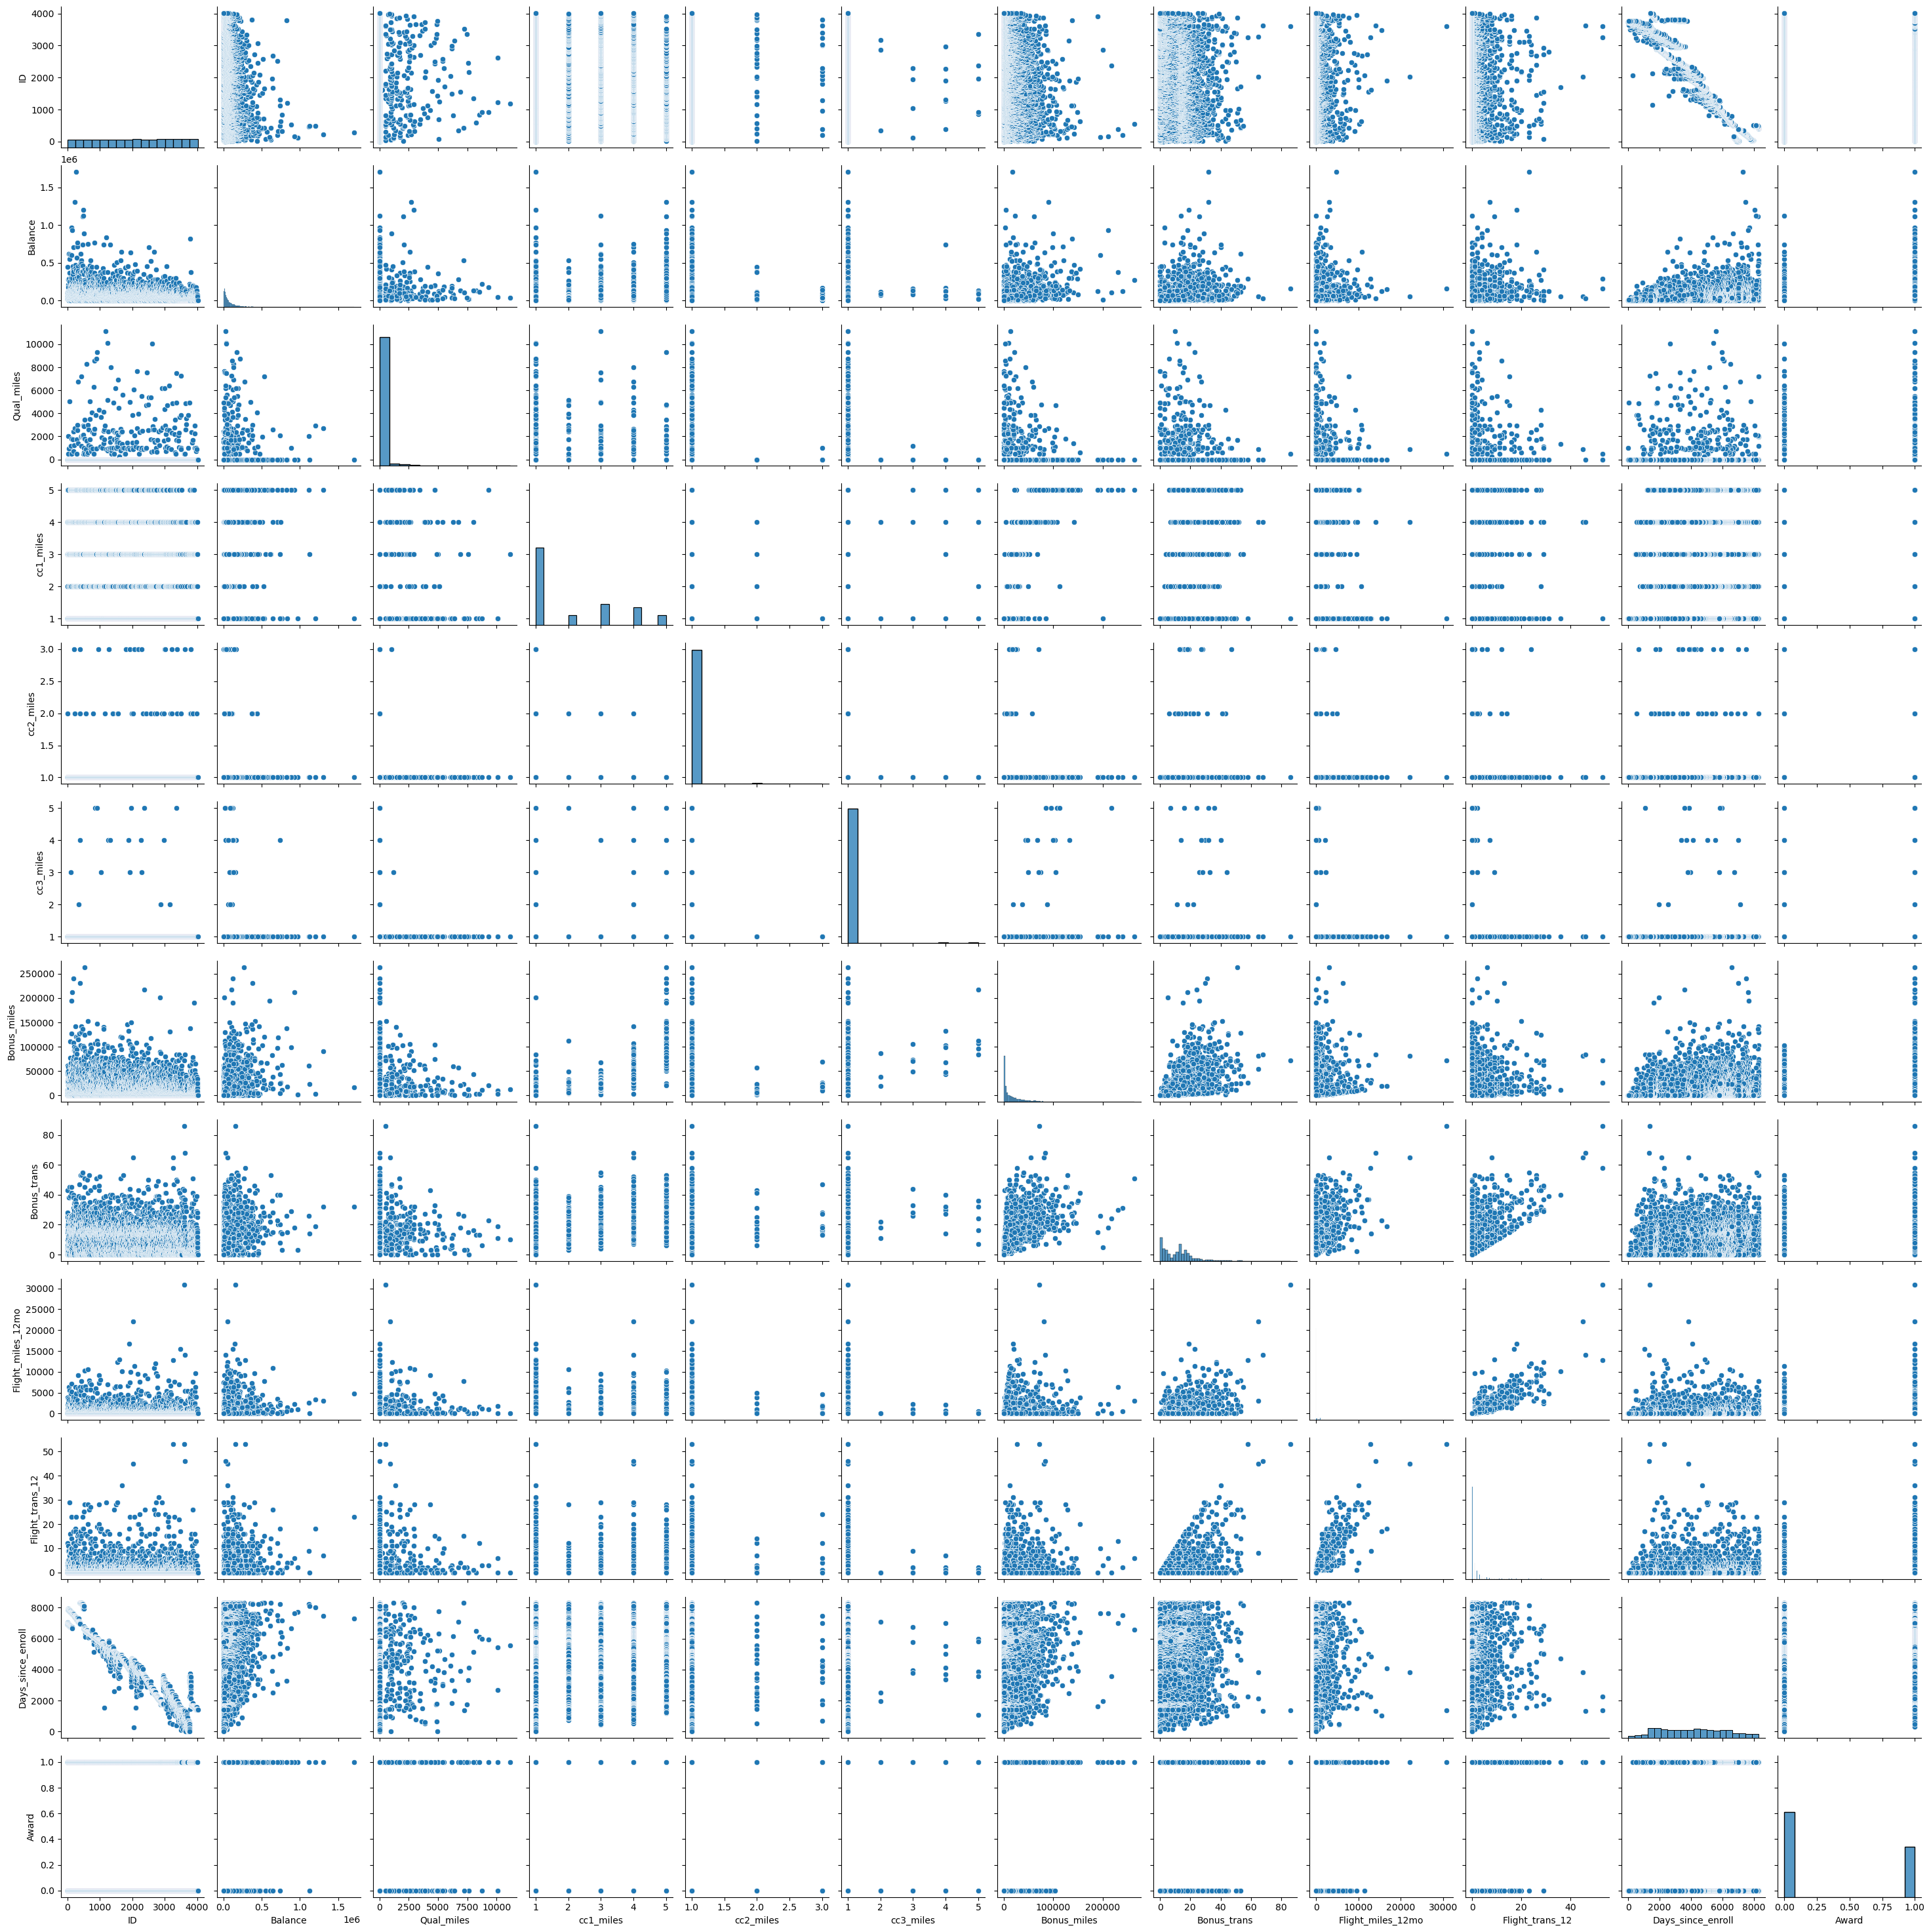

In [19]:
# Pairplot
sns.pairplot(df)

<Axes: >

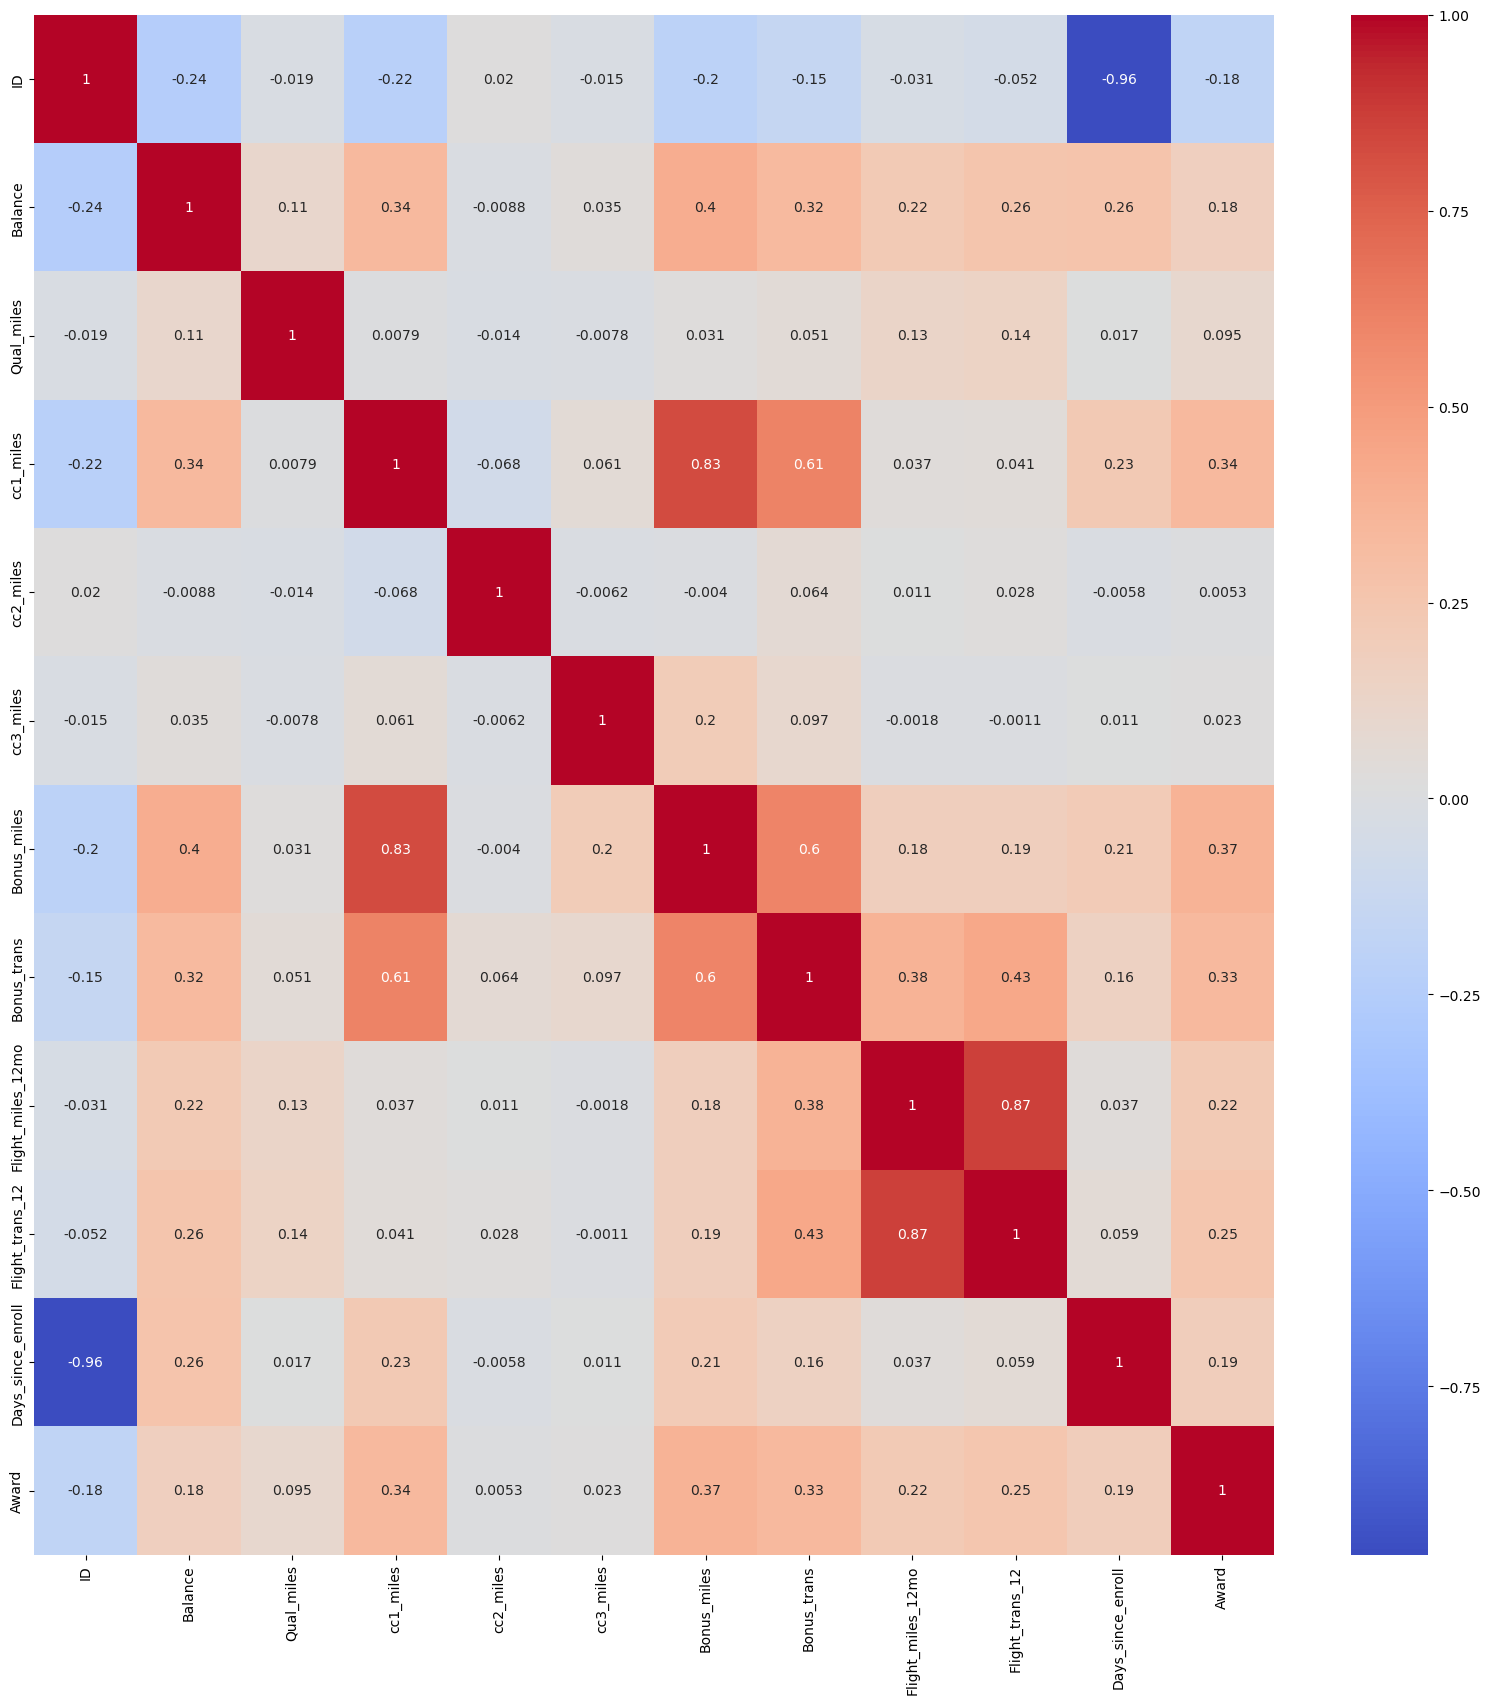

In [20]:
# Heatmap of correlations
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


In [21]:
import warnings as warn
warn.filterwarnings('ignore')

ID


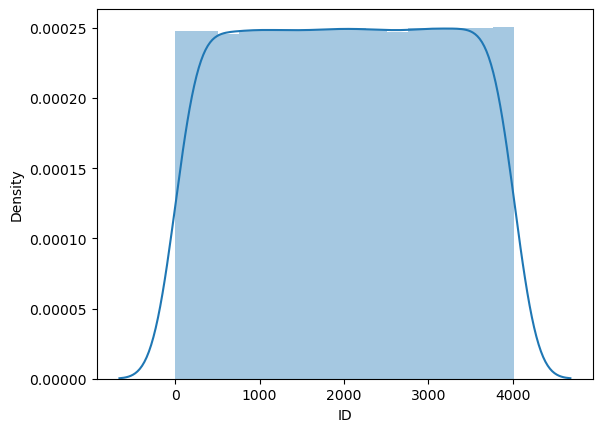

Balance


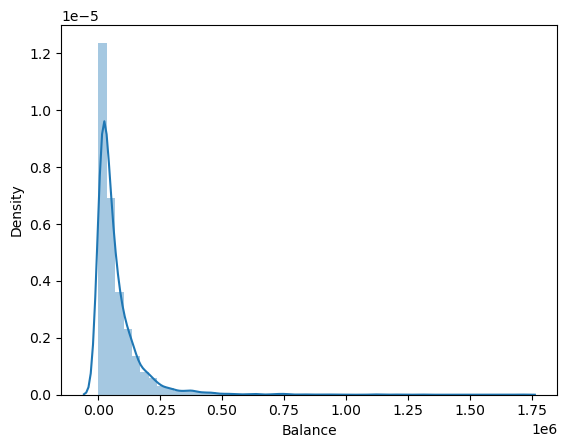

Qual_miles


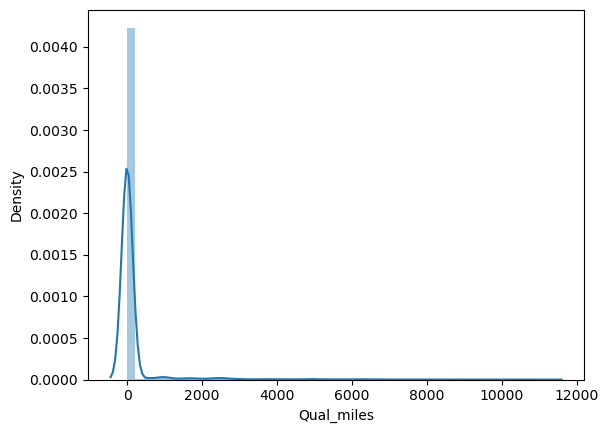

cc1_miles


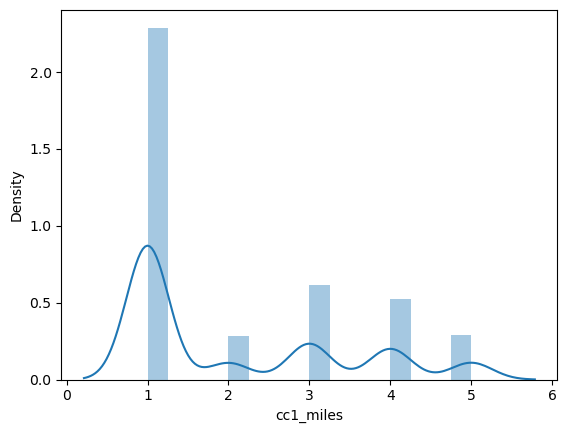

cc2_miles


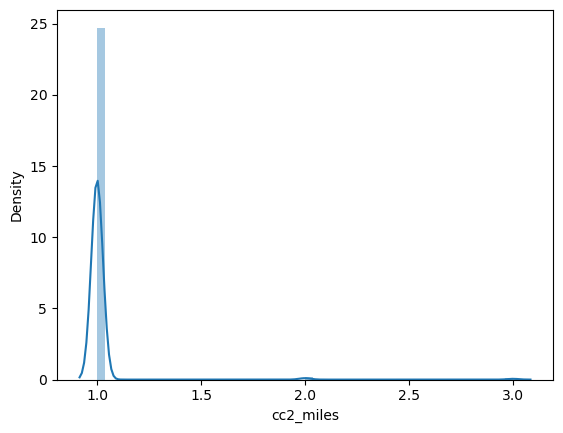

cc3_miles


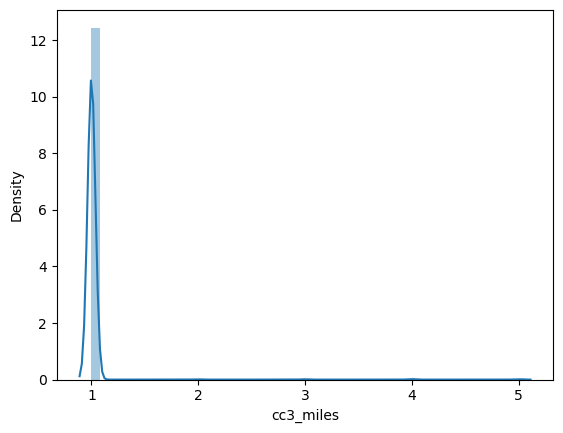

Bonus_miles


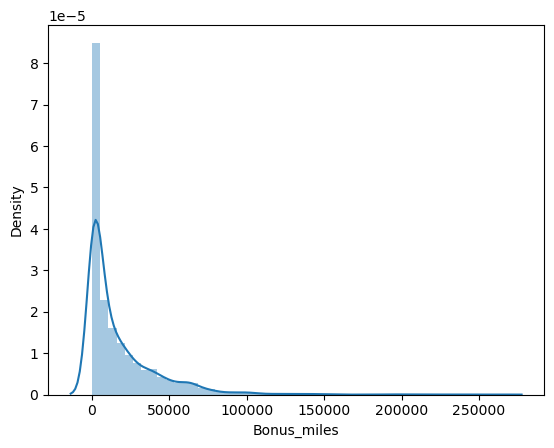

Bonus_trans


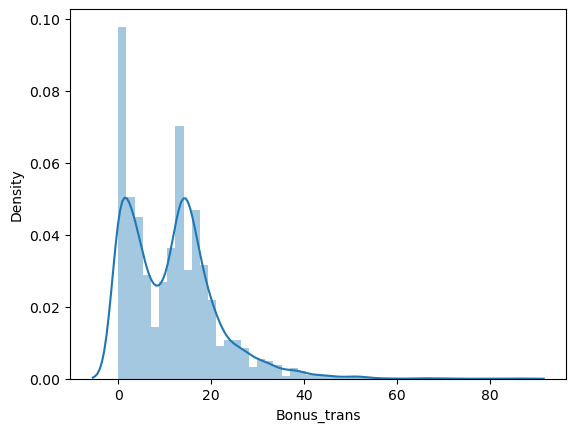

Flight_miles_12mo


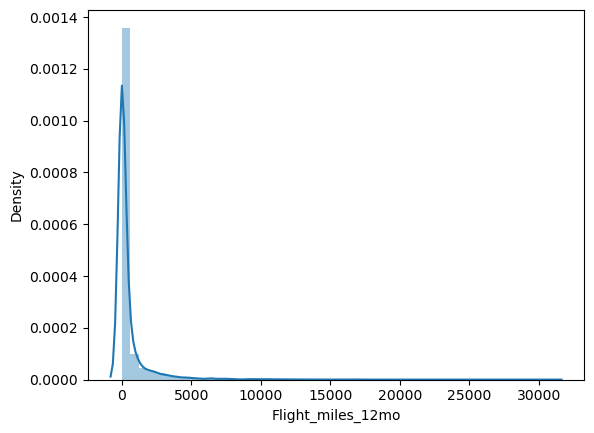

Flight_trans_12


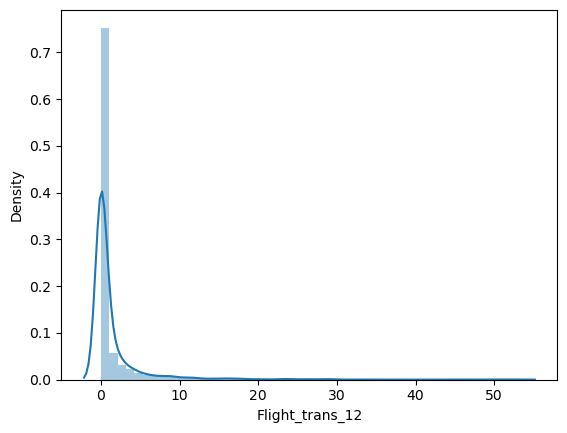

Days_since_enroll


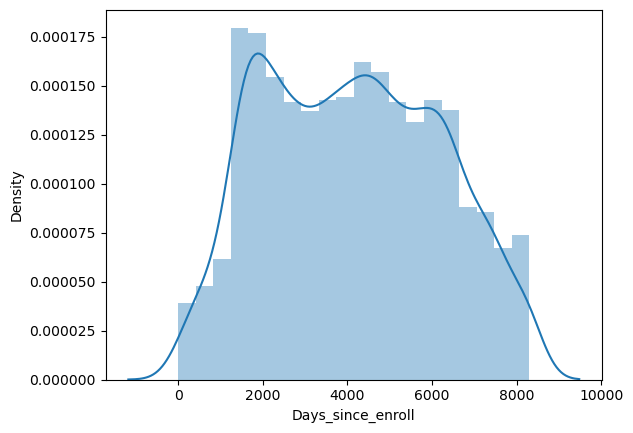

Award


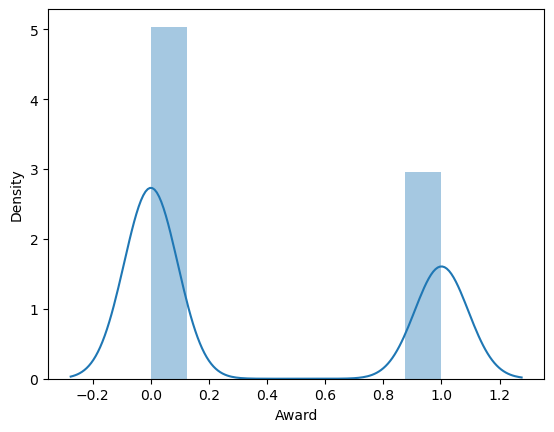

In [22]:
# Kernel Density for every feature, singled out
for n in df.columns:
    print(n)
    sns.distplot(df[n])
    plt.show()

<Axes: >

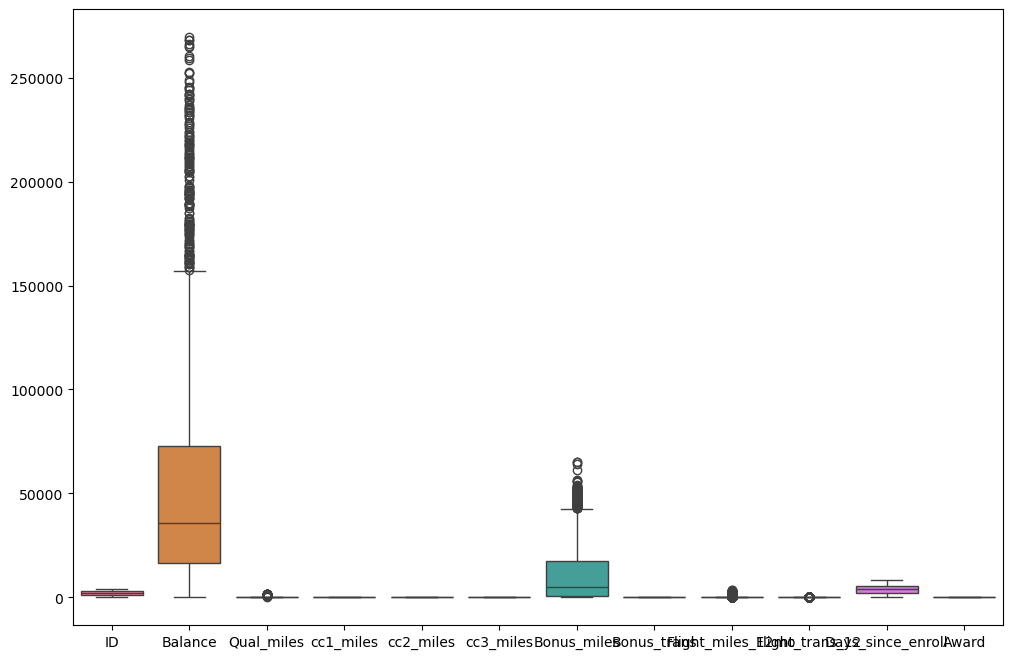

In [23]:
# Box plot for every feature in the same graph
plt.figure(figsize=(12,8))
sns.boxplot(data=data)

In [24]:
d1= len(df[df.Award == 0])
d2= len(df[df.Award == 1])
print("Percentage of Customer doesn't have a Award:{:.2f}%".format((d1/(len(df.Award))*100)))
print("Percentage of Customer does have a Award:{:.2f}%".format((d2/(len(df.Award))*100)))

Percentage of Customer doesn't have a Award:62.97%
Percentage of Customer does have a Award:37.03%


Text(0.5, 1.0, 'Whether the client has a Award or not ')

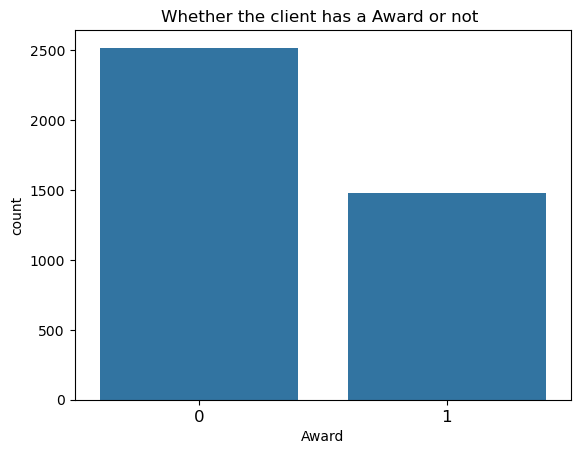

In [25]:
sns.countplot(x='Award',data=df,order=df['Award'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Whether the client has a Award or not ')

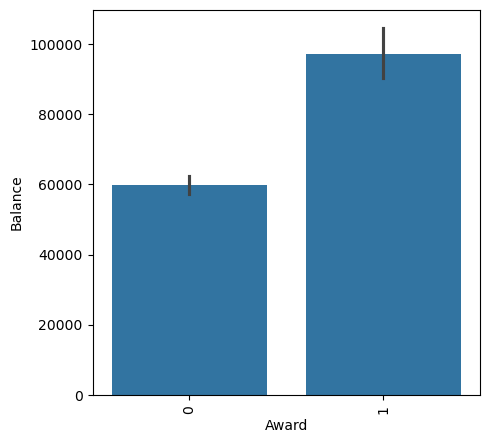

In [26]:
# Balance : Number of miles eligible for award travel
plt.figure(figsize = (5,5))
Balance = df[['Award','Balance']].sort_values('Balance', ascending = False)
ax = sns.barplot(x='Award', y='Balance', data= Balance)
ax.set(xlabel = 'Award', ylabel= 'Balance')
plt.xticks(rotation=90)
plt.show()

In [27]:
#correlation 
corr_=df.corr()
corr_['Balance'].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403487
cc1_miles            0.338344
Bonus_trans          0.324935
Days_since_enroll    0.263129
Flight_trans_12      0.255700
Flight_miles_12mo    0.217551
Award                0.178494
Qual_miles           0.108722
cc3_miles            0.035243
cc2_miles           -0.008804
ID                  -0.243737
Name: Balance, dtype: float64

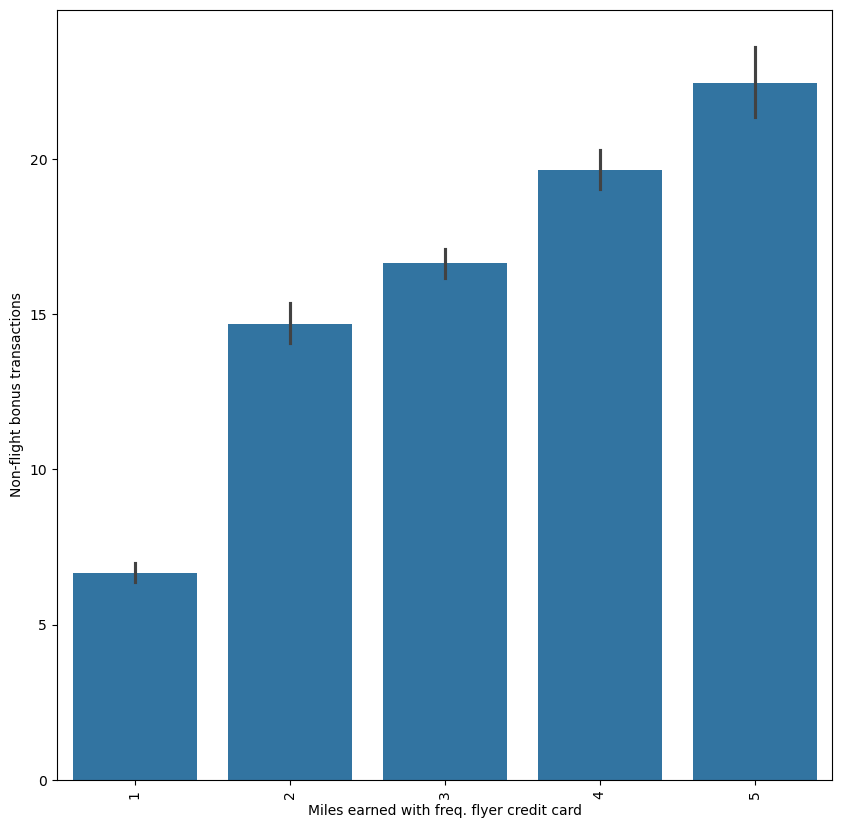

In [28]:
# Plotting frequent flying bonuses vs. non-flight bonus transactions 
plt.figure(figsize = (10,10))
sorted_data = df[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

In [29]:
#Scale Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[-1.84207797, -0.48053574, -0.12792546, ..., -0.44330127,
         1.55040081, -0.6647495 ],
       [-1.84120401, -0.6545987 , -0.12792546, ..., -0.44330127,
         1.5342953 , -0.6647495 ],
       [-1.84033006, -0.22213078, -0.12792546, ..., -0.44330127,
         1.56751291, -0.6647495 ],
       ...,
       [ 1.66946814,  0.40853694, -0.12792546, ..., -0.44330127,
        -1.26705633,  1.50432608],
       [ 1.6703421 ,  0.04280717, -0.12792546, ...,  0.32331535,
        -1.26755963, -0.6647495 ],
       [ 1.67121605, -0.97201568, -0.12792546, ..., -0.44330127,
        -1.26906952, -0.6647495 ]])

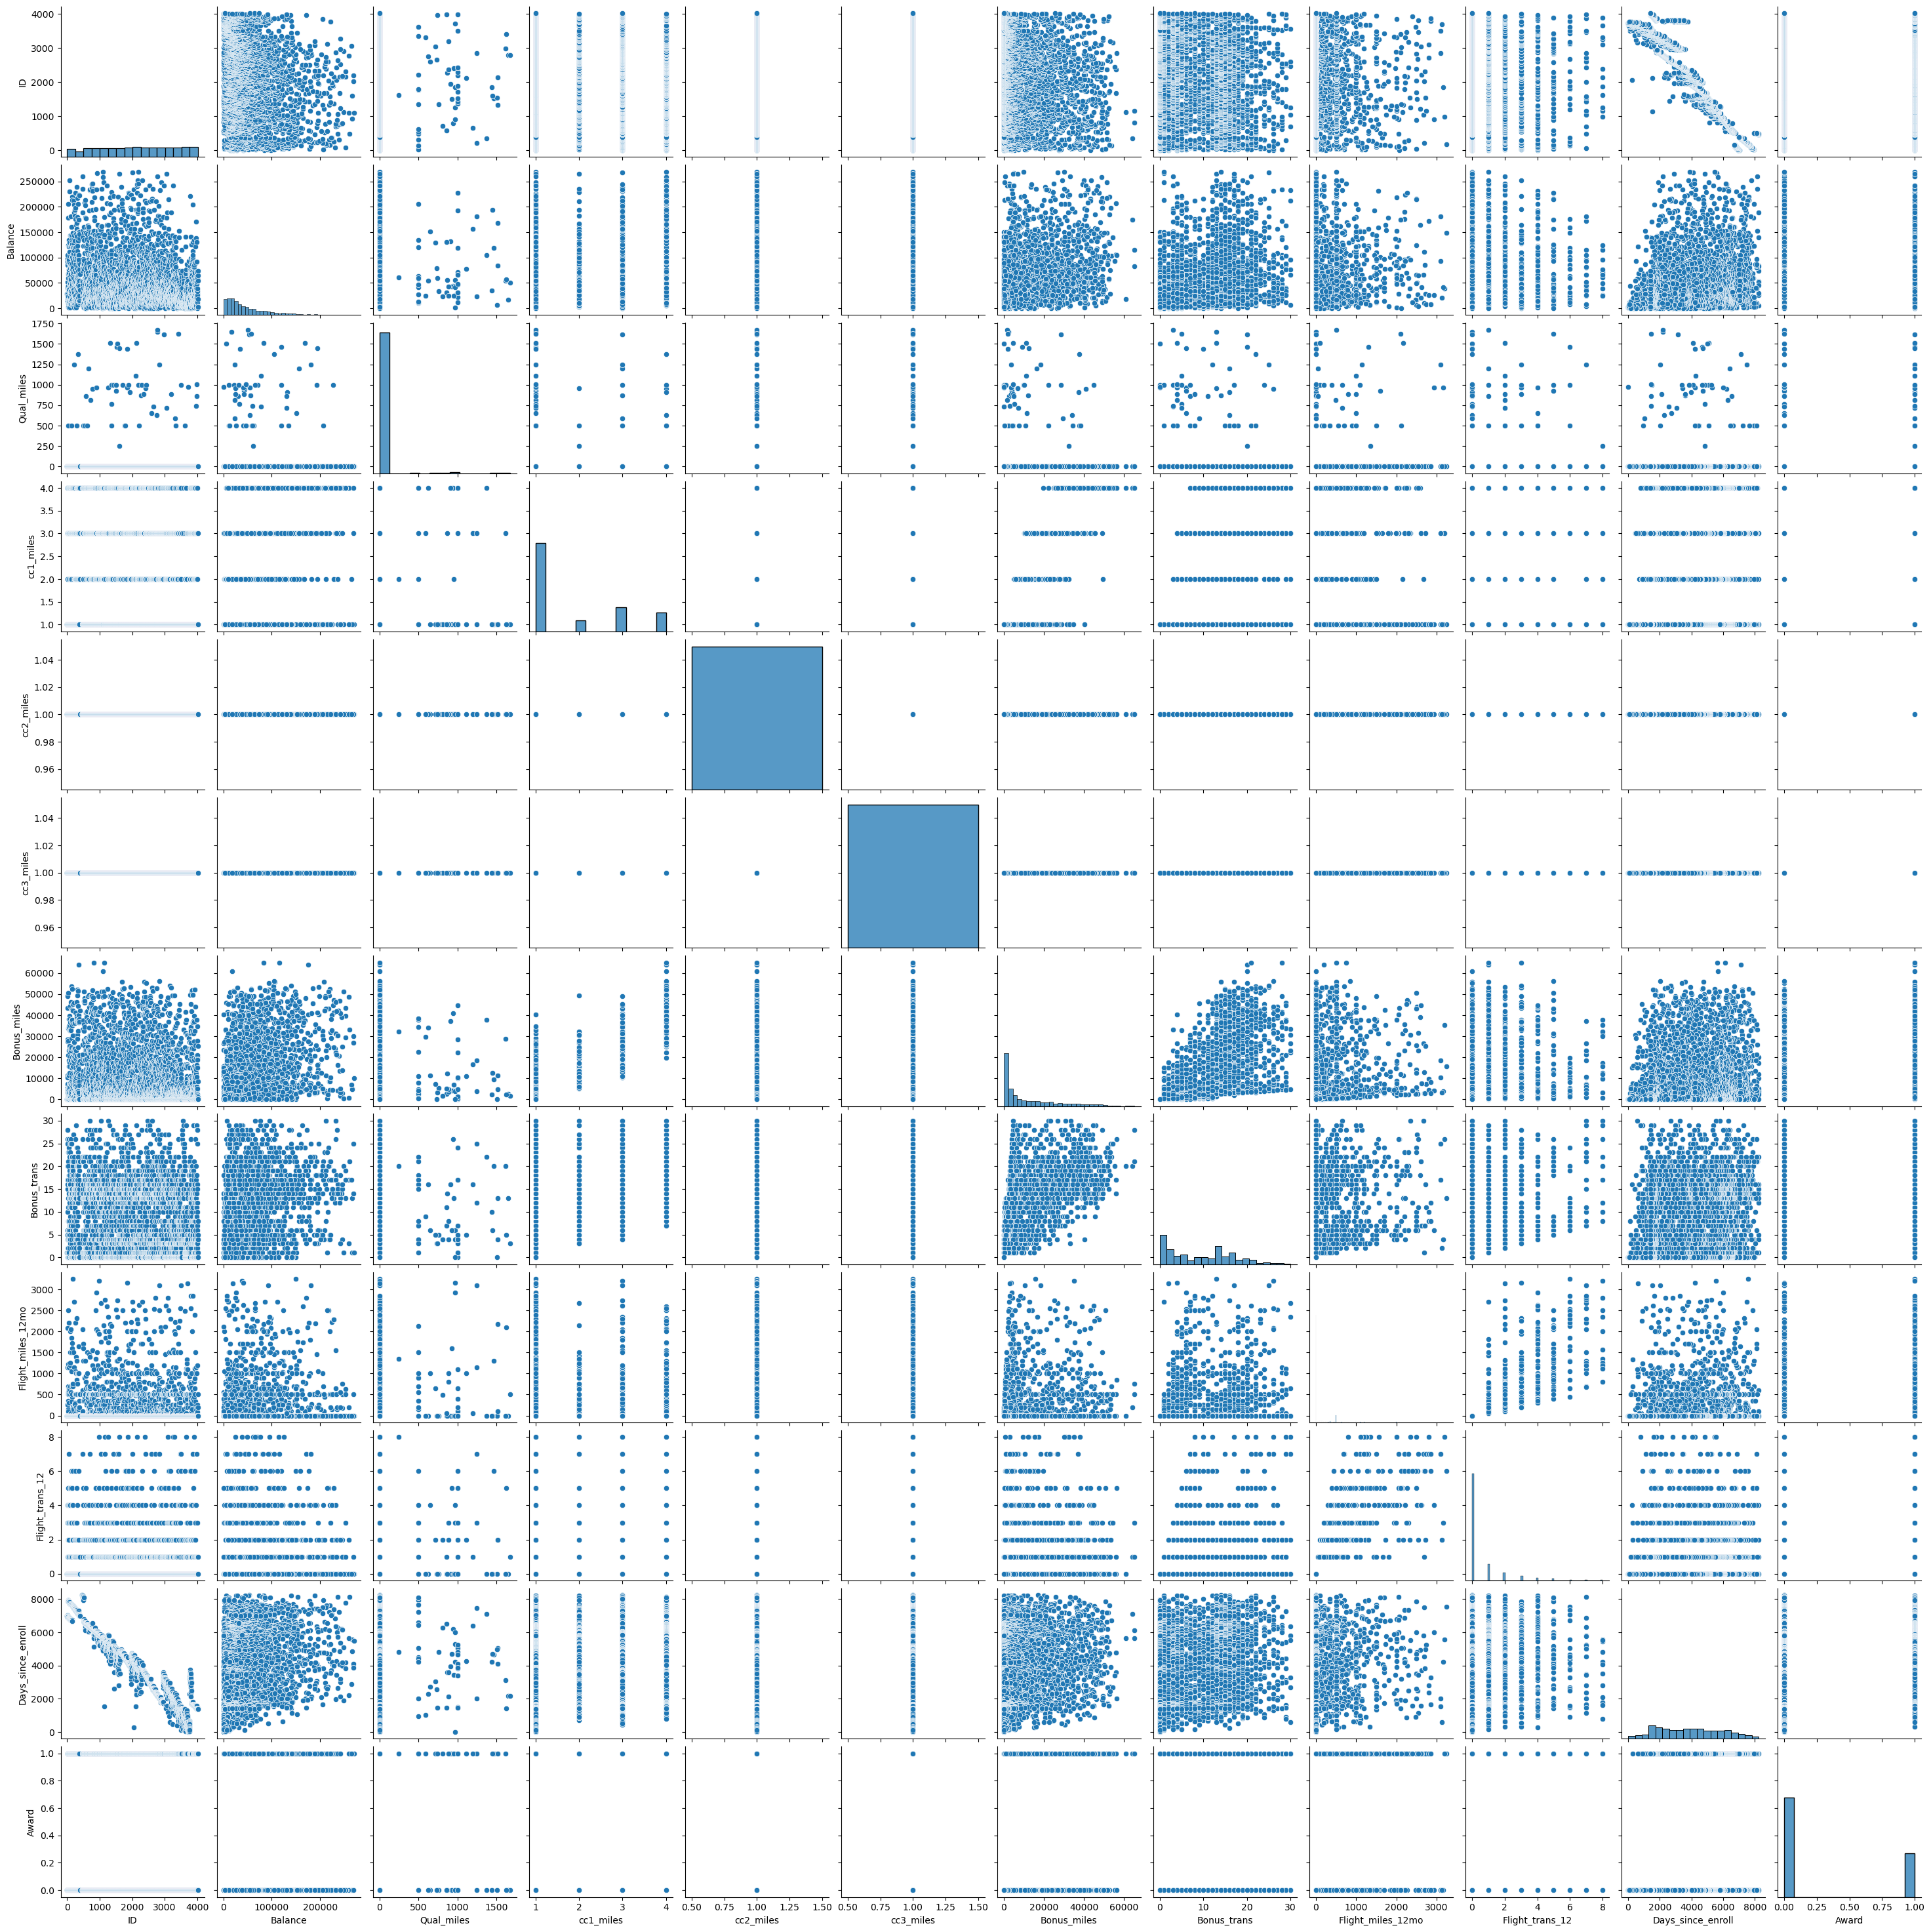

In [30]:
sns.pairplot(data=data)

## Implementing Clustering Algorithms

In [31]:
from sklearn.cluster import KMeans , AgglomerativeClustering ,DBSCAN

In [32]:
Kmeans_scores=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit_predict(scaled_data)
    Kmeans_scores.append(kmeans.inertia_)

In [33]:
Kmeans_scores

[32010.0,
 24506.637582750274,
 20534.505382540945,
 17575.23867148299,
 16384.75566533119,
 15439.00414158764,
 14507.51347672219,
 12312.310722140615,
 11524.640390132006,
 10958.615323308364]

In [34]:
kmeans.inertia_

10958.615323308364

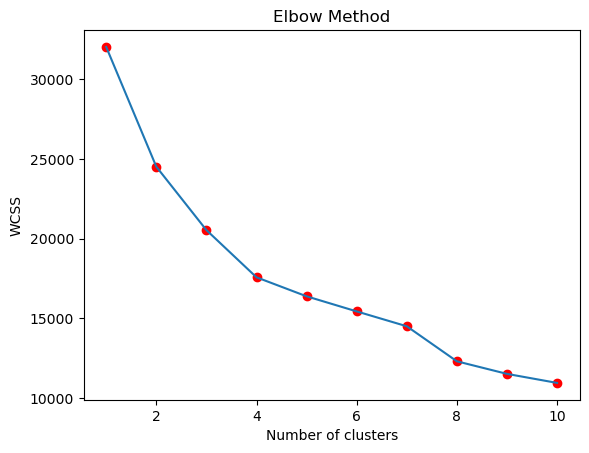

In [35]:
# Plot K values range vs WCSS to get Elbow graph for choosing K 

plt.scatter(range(1,11),Kmeans_scores,color='red')
plt.plot(range(1,11),Kmeans_scores)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()  

In [36]:
kmeans.labels_

array([5, 5, 5, ..., 3, 1, 1])

In [37]:
data['label']=kmeans.labels_
data

ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0     1     28143    0           1          1          1          174           
1     2     19244    0           1          1          1          215           
2     3     41354    0           1          1          1          4123          
3     4     14776    0           1          1          1          500           
4     5     97752    0           4          1          1          43300         
...  ..       ...   ..          ..         ..         ..            ...         
3994  4017  18476    0           1          1          1          8525          
3995  4018  64385    0           1          1          1          981           
3996  4019  73597    0           3          1          1          25447         
3997  4020  54899    0           1          1          1          500           
3998  4021  3016     0           1          1          1          0             

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0     1            0                  0                7000                
1     2            0                  0                6968                
2     4            0                  0                7034                
3     1            0                  0                6952                
4     26           2077               4                6935                
...   ..            ...              ..                 ...                
3994  4            200                1                1403                
3995  5            0                  0                1395                
3996  8            0                  0                1402                
3997  1            500                1                1401                
3998  0            0                  0                1398                

      Award  label  
0     0      5      
1     0      5      
2     0      5      
3     0      5      
4     1      9      
...  ..     ..      
3994  1      1      
3995  1      1      
3996  1      3      
3997  0      1      
3998  0      1      

[3201 rows x 13 columns]

In [38]:
data.groupby('label').agg(['mean'])

ID        Balance   Qual_miles cc1_miles cc2_miles cc3_miles  \
              mean           mean         mean      mean      mean      mean   
label                                                                          
0      1380.047059  184491.611765  0.000000     3.241176  1.0       1.0        
1      3253.031395  26254.459302   0.581395     1.055814  1.0       1.0        
2      1864.208333  37708.125000   4.464286     1.217262  1.0       1.0        
3      2991.325779  60981.762040   4.866856     3.246459  1.0       1.0        
4      1178.684543  78827.034700   0.000000     2.451104  1.0       1.0        
5      1229.486159  30900.892734   0.000000     1.015571  1.0       1.0        
6      2080.750000  74750.545455   1091.727273  1.590909  1.0       1.0        
7      2121.556180  61107.387640   8.426966     1.067416  1.0       1.0        
8      1106.992218  55343.365759   3.891051     3.579767  1.0       1.0        
9      1829.777778  86565.388889   11.574074    2.305556  1.0       1.0        

        Bonus_miles Bonus_trans Flight_miles_12mo Flight_trans_12  \
               mean        mean              mean            mean   
label                                                               
0      29185.300000  15.488235   146.794118        0.464706         
1      2522.610465   5.230233    34.468605         0.133721         
2      5991.217262   7.252976    76.669643         0.267857         
3      25784.609065  16.271955   105.399433        0.337110         
4      14340.252366  15.321767   66.255521         0.227129         
5      1777.593426   3.958478    32.932526         0.121107         
6      9945.431818   9.022727    581.977273        1.636364         
7      4308.162921   6.477528    926.005618        3.151685         
8      31207.887160  16.735409   139.568093        0.455253         
9      20862.722222  16.212963   1952.425926       5.148148         

      Days_since_enroll     Award  
                   mean      mean  
label                              
0      5185.311765       0.294118  
1      1917.593023       0.022093  
2      4330.502976       1.000000  
3      2462.441926       0.453258  
4      5544.757098       0.009464  
5      5394.809689       0.000000  
6      3953.590909       0.500000  
7      3952.500000       0.426966  
8      5663.544747       0.961089  
9      4467.694444       0.629630

In [39]:
# Choose the optimal number of clusters (e.g., based on the elbow point)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)
data['Cluster_KMeans'] = kmeans_labels

In [40]:
# Hac

In [41]:
agglo = AgglomerativeClustering(n_clusters=3,metric='euclidean', linkage='complete')
agglo_labels = agglo.fit_predict(scaled_data)
agglo_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
data['labels']=agglo_labels
data

ID  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0     1     28143    0           1          1          1          174           
1     2     19244    0           1          1          1          215           
2     3     41354    0           1          1          1          4123          
3     4     14776    0           1          1          1          500           
4     5     97752    0           4          1          1          43300         
...  ..       ...   ..          ..         ..         ..            ...         
3994  4017  18476    0           1          1          1          8525          
3995  4018  64385    0           1          1          1          981           
3996  4019  73597    0           3          1          1          25447         
3997  4020  54899    0           1          1          1          500           
3998  4021  3016     0           1          1          1          0             

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0     1            0                  0                7000                
1     2            0                  0                6968                
2     4            0                  0                7034                
3     1            0                  0                6952                
4     26           2077               4                6935                
...   ..            ...              ..                 ...                
3994  4            200                1                1403                
3995  5            0                  0                1395                
3996  8            0                  0                1402                
3997  1            500                1                1401                
3998  0            0                  0                1398                

      Award  label  Cluster_KMeans  labels  
0     0      5      1               0       
1     0      5      1               0       
2     0      5      1               0       
3     0      5      1               0       
4     1      9      0               0       
...  ..     ..     ..              ..       
3994  1      1      1               0       
3995  1      1      1               0       
3996  1      3      2               0       
3997  0      1      1               0       
3998  0      1      1               0       

[3201 rows x 15 columns]

In [43]:
data.groupby('labels').mean()

ID       Balance   Qual_miles  cc1_miles  cc2_miles  \
labels                                                                 
0       2109.746345  52379.628099  0.556262     1.817546   1.0         
1       1859.400000  98406.266667  1435.000000  1.800000   1.0         
2       2124.075000  61595.725000  805.725000   1.550000   1.0         

        cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
labels                                                            
0       1.0        11042.174825  9.393516     179.352193          
1       1.0        13035.800000  12.400000    698.400000          
2       1.0        9077.625000   8.025000     501.300000          

        Flight_trans_12  Days_since_enroll     Award     label  Cluster_KMeans  
labels                                                                          
0       0.559123         3917.811825        0.303560  3.489193  1.252066        
1       1.800000         4252.466667        0.466667  6.000000  0.866667        
2       1.625000         3928.350000        0.475000  5.500000  0.750000

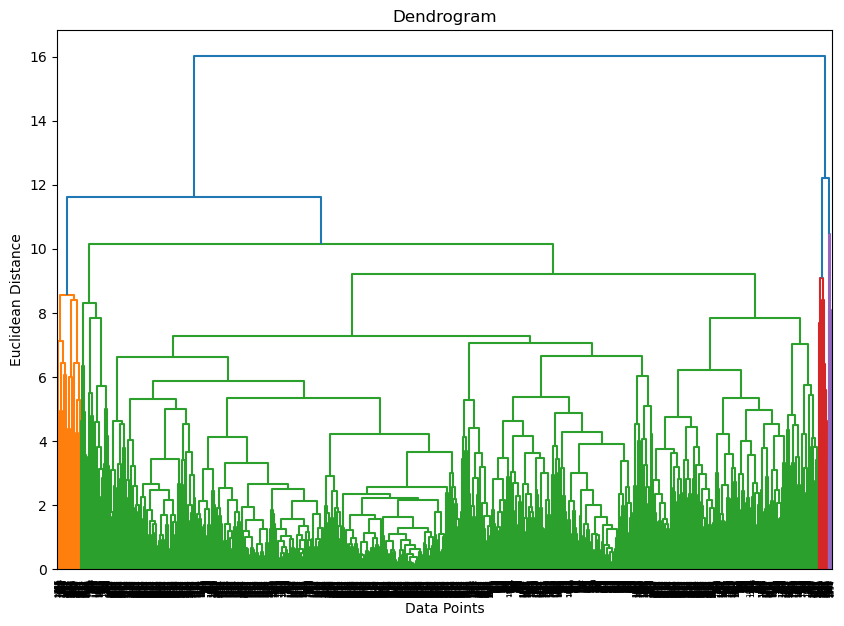

In [44]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
linkage_matrix = linkage(scaled_data, method='complete')  # Method can be 'single', 'complete', 'average'

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()


In [45]:
## Dbscan

In [46]:
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Replace eps and min_samples based on elbow plot
labels_dbscan = dbscan.fit_predict(scaled_data)
labels_dbscan

array([ 0,  0,  0, ..., -1, -1,  0], dtype=int64)

In [47]:
data['Cluster_dbscan'] = dbscan.labels_
cluster_summary = data.groupby('Cluster_dbscan').mean()
cluster_summary

ID        Balance  Qual_miles  cc1_miles  cc2_miles  \
Cluster_dbscan                                                                 
-1              1938.901533  75515.057783   32.726415   2.239387   1.0         
 0              2400.467450  21418.836347   0.000000    1.000000   1.0         
 1              1907.463415  24450.097561   0.000000    1.000000   1.0         
 2              281.800000   9765.200000    0.000000    2.000000   1.0         
 3              885.100000   98587.300000   0.000000    3.000000   1.0         
 4              1025.266667  24415.200000   0.000000    3.000000   1.0         
 5              1294.520000  66987.600000   0.000000    3.000000   1.0         
 6              1133.583333  31140.916667   0.000000    2.000000   1.0         
 7              890.000000   82733.400000   0.000000    4.000000   1.0         
 8              1229.444444  13901.444444   0.000000    1.000000   1.0         
 9              1234.833333  120697.833333  0.000000    3.000000   1.0         
 10             1529.400000  99450.800000   0.000000    4.000000   1.0         
 11             1850.333333  54029.666667   0.000000    4.000000   1.0         
 12             2781.633333  42027.533333   0.000000    2.000000   1.0         
 13             2113.875000  40896.000000   0.000000    4.000000   1.0         
 14             2566.233333  21578.166667   0.000000    3.000000   1.0         
 15             2356.578947  90617.052632   0.000000    3.000000   1.0         
 16             2068.000000  52065.400000   0.000000    4.000000   1.0         
 17             2857.000000  17818.266667   0.000000    1.000000   1.0         
 18             2856.142857  73353.523810   0.000000    3.000000   1.0         
 19             2907.928571  39700.642857   0.000000    3.000000   1.0         
 20             3541.083333  24126.333333   0.000000    1.000000   1.0         
 21             3542.000000  21436.200000   0.000000    1.000000   1.0         
 22             3743.600000  49543.800000   0.000000    3.000000   1.0         
 23             3899.500000  5583.833333    0.000000    1.000000   1.0         

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Cluster_dbscan                                                            
-1              1.0        17135.566627  12.587264    347.816038          
 0              1.0        1290.402351   4.153707     0.000000            
 1              1.0        1395.268293   1.853659     0.000000            
 2              1.0        8086.000000   13.600000    0.000000            
 3              1.0        22214.800000  15.000000    0.000000            
 4              1.0        17923.233333  15.066667    0.000000            
 5              1.0        16182.180000  13.120000    0.000000            
 6              1.0        6795.166667   12.416667    0.000000            
 7              1.0        29797.600000  14.200000    0.000000            
 8              1.0        3274.722222   11.944444    0.000000            
 9              1.0        13873.000000  15.666667    0.000000            
 10             1.0        32456.600000  15.400000    0.000000            
 11             1.0        28637.500000  13.166667    0.000000            
 12             1.0        8037.266667   13.866667    0.000000            
 13             1.0        29922.000000  14.125000    0.000000            
 14             1.0        16182.733333  14.500000    0.000000            
 15             1.0        16654.842105  13.000000    0.000000            
 16             1.0        39220.400000  13.200000    0.000000            
 17             1.0        368.600000    1.533333     158.266667          
 18             1.0        20382.000000  15.095238    0.000000            
 19             1.0        13769.785714  13.642857    0.000000            
 20             1.0        16048.333333  4.916667     0.000000            
 21             1.0        500.000000    1.000000     500.000000

## Visualization


### for Kmeans

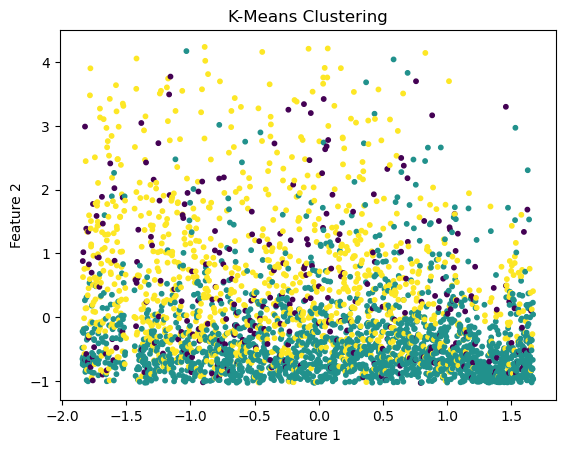

In [48]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


### for Hac

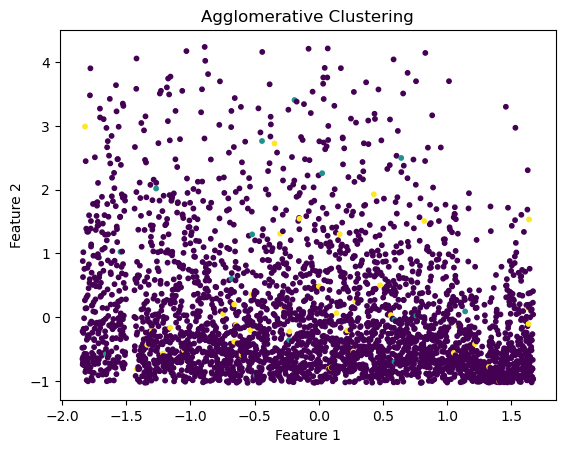

In [49]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=agglo_labels, cmap='viridis', s=10)
plt.title("Agglomerative Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### for Dbscan

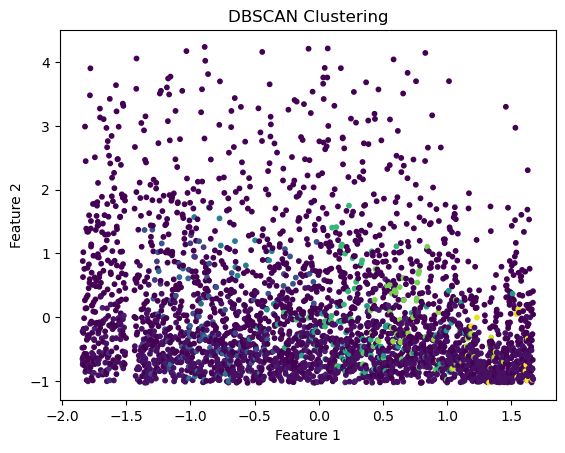

In [50]:
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels_dbscan, cmap='viridis', s=10)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Evaluation and Performance Metrics

In [51]:
from sklearn.metrics import silhouette_score

### for Kmeans

In [52]:
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    print(f"Number of Clusters: {n_clusters}, Silhouette Score: {score}")

Number of Clusters: 2, Silhouette Score: 0.285845905559803
Number of Clusters: 3, Silhouette Score: 0.29846691383275037
Number of Clusters: 4, Silhouette Score: 0.24683768502344447
Number of Clusters: 5, Silhouette Score: 0.23801230243999924
Number of Clusters: 6, Silhouette Score: 0.232902500667836
Number of Clusters: 7, Silhouette Score: 0.24582321923599015
Number of Clusters: 8, Silhouette Score: 0.25455132476081027
Number of Clusters: 9, Silhouette Score: 0.25916116107512593


### for Hac

In [53]:
agglo = AgglomerativeClustering(n_clusters=3,metric='euclidean', linkage='complete')
agglo_labels = agglo.fit_predict(scaled_data)
print("Agglomerative Clustering Silhouette Score:", silhouette_score(scaled_data, agglo_labels))

Agglomerative Clustering Silhouette Score: 0.48020893183741203


### for Dbscan

In [54]:
for min_samples in [4,5, 6, 8, 10]:
    dbscan = DBSCAN(eps=1.6, min_samples=min_samples)
    labels = dbscan.fit_predict(scaled_data)
    if len(set(labels)) > 1:  # Only calculate score if there are at least 2 clusters
        score = silhouette_score(scaled_data, labels)
        print(f"Min Samples: {min_samples}, Silhouette Score: {score}")

Min Samples: 4, Silhouette Score: 0.17014050067124095
Min Samples: 5, Silhouette Score: 0.21412576730028904
Min Samples: 6, Silhouette Score: 0.21354549519698718
Min Samples: 8, Silhouette Score: 0.21169105828782117
Min Samples: 10, Silhouette Score: 0.21035970318876104


# Use PCA to reduce dimensionality for visualization

In [55]:
from sklearn.decomposition import PCA

In [56]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

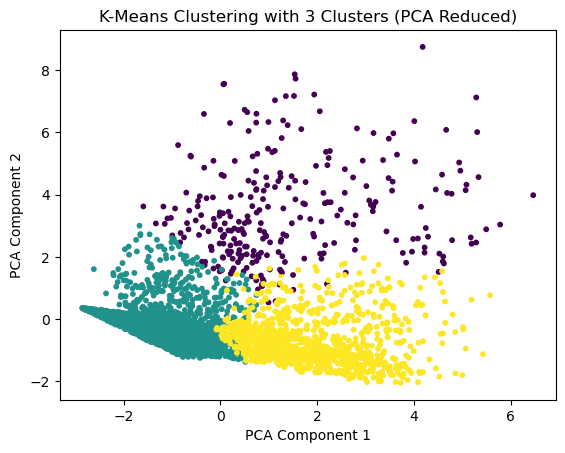

In [57]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(scaled_data)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', s=10)
plt.title("K-Means Clustering with 3 Clusters (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


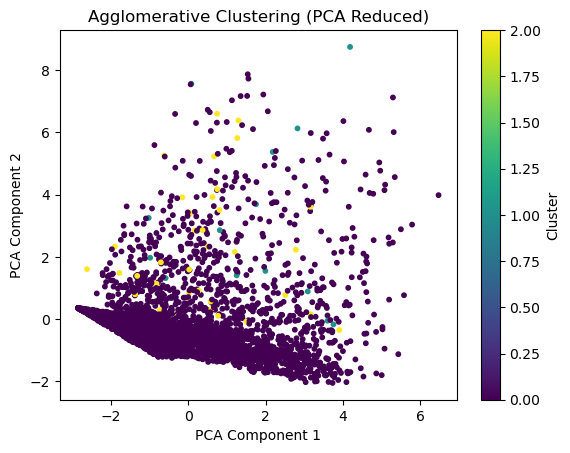

In [58]:
agglo = AgglomerativeClustering(n_clusters=3,metric='euclidean', linkage='complete')
agglo_labels = agglo.fit_predict(scaled_data)

# Visualize Agglomerative Clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=agglo_labels, cmap='viridis', s=10)
plt.title("Agglomerative Clustering (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

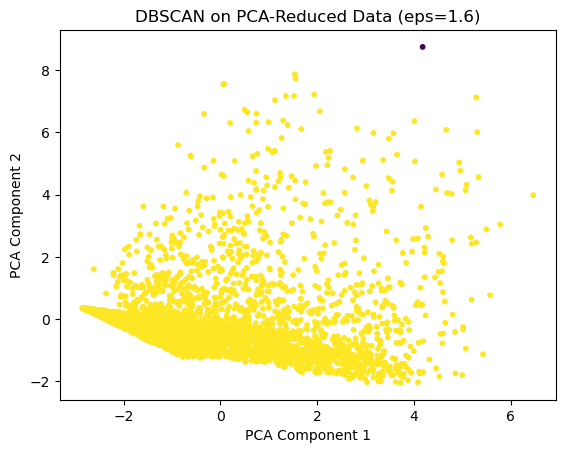

In [59]:
dbscan = DBSCAN(eps=1.6, min_samples=5)
labels_dbscan = dbscan.fit_predict(reduced_data)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels_dbscan, cmap='viridis', s=10)
plt.title("DBSCAN on PCA-Reduced Data (eps=1.6)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [60]:
##end